In [2]:
import pandas as pd
import numpy as np

dict_obj = {'key1' : ['a', 'b', 'a', 'b', 
                      'a', 'b', 'a', 'a'],
            'key2' : ['one', 'one', 'two', 'three',
                      'two', 'two', 'one', 'three'],
            'data1': [np.random.randint(1,10) for i in range(8)],
            'data2': [np.random.randint(1,10) for i in range(8)]}
df_obj = pd.DataFrame(dict_obj)
print(df_obj)

  key1   key2  data1  data2
0    a    one      2      5
1    b    one      7      9
2    a    two      1      9
3    b  three      7      1
4    a    two      3      8
5    b    two      1      3
6    a    one      9      5
7    a  three      7      5


In [3]:
df_obj.groupby('key1')

In [5]:
df_obj.groupby('key1').mean(numeric_only=True)

,data1,data2
key1,,
a,4.4,6.400000
b,5.0,4.333333


In [7]:
df_obj['data1'].groupby(df_obj['key1']).mean()

key1
a    4.4
b    5.0
Name: data1, dtype: float64

In [9]:
print(df_obj.groupby('key1').describe())

     data1                                         data2                      \
     count mean       std  min  25%  50%  75%  max count      mean       std   
key1                                                                           
a      5.0  4.4  3.435113  1.0  2.0  3.0  7.0  9.0   5.0  6.400000  1.949359   
b      3.0  5.0  3.464102  1.0  4.0  7.0  7.0  7.0   3.0  4.333333  4.163332   

                               
      min  25%  50%  75%  max  
key1                           
a     5.0  5.0  5.0  8.0  9.0  
b     1.0  2.0  3.0  6.0  9.0  


In [11]:
#自定义聚合函数
# 自定义聚合函数
def peak_range(df):
    """
        返回数值范围
    """
    #print type(df) #参数为索引所对应的记录
    return df.max() - df.min()

print(df_obj.loc[:, ['key1','data1', 'data2']].groupby('key1').agg(peak_range))
print(df_obj.loc[:, ['key1','data1', 'data2']].groupby('key1').agg(lambda df : df.max() - df.min()))

      data1  data2
key1              
a         8      4
b         6      8
      data1  data2
key1              
a         8      4
b         6      8


In [12]:
# 同时应用多个聚合函数
print(df_obj.loc[:, ['key1','data1', 'data2']].groupby('key1').agg(['mean', 'std', 'count', peak_range]))

     data1                                data2                           
      mean       std count peak_range      mean       std count peak_range
key1                                                                      
a      4.4  3.435113     5          8  6.400000  1.949359     5          4
b      5.0  3.464102     3          6  4.333333  4.163332     3          8


# 实战星巴克开店数量

In [13]:
file_path = "./starbucks_store_worldwide.csv"

df = pd.read_csv(file_path)
print(df.head(1))
print(df.info())


       Brand  Store Number     Store Name Ownership Type     Street Address  \
0  Starbucks  47370-257954  Meritxell, 96       Licensed  Av. Meritxell, 96   

               City State/Province Country Postcode Phone Number  \
0  Andorra la Vella              7      AD    AD500    376818720   

                  Timezone  Longitude  Latitude  
0  GMT+1:00 Europe/Andorra       1.53     42.51  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25600 entries, 0 to 25599
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Brand           25600 non-null  object 
 1   Store Number    25600 non-null  object 
 2   Store Name      25600 non-null  object 
 3   Ownership Type  25600 non-null  object 
 4   Street Address  25598 non-null  object 
 5   City            25585 non-null  object 
 6   State/Province  25600 non-null  object 
 7   Country         25600 non-null  object 
 8   Postcode        24078 non-null  object 


In [15]:
grouped = df.groupby(by="Country")
grouped['Brand'].count().loc['US'] 

13608

In [16]:
grouped['Brand'].count().loc['CN'] 

2734

# 设置索引

In [17]:
df_obj

,key1,key2,data1,data2
0,a,one,2,5
1,b,one,7,9
2,a,two,1,9
3,b,three,7,1
4,a,two,3,8
5,b,two,1,3
6,a,one,9,5
7,a,three,7,5


In [18]:
df_obj.index=list('abcdefgh')

In [19]:
df_obj

,key1,key2,data1,data2
a,a,one,2,5
b,b,one,7,9
c,a,two,1,9
d,b,three,7,1
e,a,two,3,8
f,b,two,1,3
g,a,one,9,5
h,a,three,7,5


In [23]:
df_obj.set_index('key1',inplace=True)

In [26]:
df_obj

,key2,data1,data2
key1,,,
a,one,2,5
b,one,7,9
a,two,1,9
b,three,7,1
a,two,3,8
b,two,1,3
a,one,9,5
a,three,7,5


# 时间序列

In [29]:
import pandas as pd
from datetime import datetime, timedelta

# 获取今天的日期
today = datetime.today().date()

# 找到7月的最后一天
end_of_july = datetime(today.year, 7, 31).date()
print(end_of_july)
# 生成日期序列，每周的周一到周五
date_range = pd.bdate_range(start=today, end=end_of_july)
date_range

2025-07-31


DatetimeIndex(['2025-06-13', '2025-06-16', '2025-06-17', '2025-06-18',
               '2025-06-19', '2025-06-20', '2025-06-23', '2025-06-24',
               '2025-06-25', '2025-06-26', '2025-06-27', '2025-06-30',
               '2025-07-01', '2025-07-02', '2025-07-03', '2025-07-04',
               '2025-07-07', '2025-07-08', '2025-07-09', '2025-07-10',
               '2025-07-11', '2025-07-14', '2025-07-15', '2025-07-16',
               '2025-07-17', '2025-07-18', '2025-07-21', '2025-07-22',
               '2025-07-23', '2025-07-24', '2025-07-25', '2025-07-28',
               '2025-07-29', '2025-07-30', '2025-07-31'],
              dtype='datetime64[ns]', freq='B')

# 911案例练习

In [31]:
df=pd.read_csv("911.csv")
# df.info()
df["timeStamp"] = pd.to_datetime(df["timeStamp"])

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249737 entries, 0 to 249736
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   lat        249737 non-null  float64       
 1   lng        249737 non-null  float64       
 2   desc       249737 non-null  object        
 3   zip        219391 non-null  float64       
 4   title      249737 non-null  object        
 5   timeStamp  249737 non-null  datetime64[ns]
 6   twp        249644 non-null  object        
 7   addr       249737 non-null  object        
 8   e          249737 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 17.1+ MB


In [34]:
# 添加列，表示分类
temp_list = df["title"].str.split(": ").tolist()
cate_list = [i[0] for i in temp_list]
cate_list

['EMS',
 'EMS',
 'Fire',
 'EMS',
 'EMS',
 'EMS',
 'EMS',
 'EMS',
 'EMS',
 'Traffic',
 'Traffic',
 'Traffic',
 'Traffic',
 'Traffic',
 'Traffic',
 'Traffic',
 'EMS',
 'EMS',
 'EMS',
 'Traffic',
 'Traffic',
 'Traffic',
 'Fire',
 'Traffic',
 'Traffic',
 'EMS',
 'EMS',
 'Fire',
 'Traffic',
 'Traffic',
 'Traffic',
 'EMS',
 'EMS',
 'Traffic',
 'Traffic',
 'Traffic',
 'Traffic',
 'EMS',
 'Traffic',
 'Fire',
 'EMS',
 'Traffic',
 'EMS',
 'Traffic',
 'EMS',
 'Fire',
 'Traffic',
 'Traffic',
 'EMS',
 'Fire',
 'Traffic',
 'EMS',
 'Fire',
 'Traffic',
 'EMS',
 'EMS',
 'EMS',
 'EMS',
 'Traffic',
 'Traffic',
 'Traffic',
 'EMS',
 'EMS',
 'EMS',
 'EMS',
 'EMS',
 'EMS',
 'EMS',
 'EMS',
 'EMS',
 'Fire',
 'EMS',
 'EMS',
 'EMS',
 'EMS',
 'Traffic',
 'Traffic',
 'EMS',
 'EMS',
 'Traffic',
 'EMS',
 'Fire',
 'EMS',
 'EMS',
 'EMS',
 'Fire',
 'EMS',
 'EMS',
 'Traffic',
 'Fire',
 'Traffic',
 'Fire',
 'Traffic',
 'Traffic',
 'Traffic',
 'Traffic',
 'EMS',
 'EMS',
 'EMS',
 'EMS',
 'EMS',
 'Fire',
 'Traffic',
 'EMS',

In [35]:
df["cate"] = pd.DataFrame(np.array(cate_list))

In [37]:
df.set_index("timeStamp", inplace=True)




                           lat        lng  \
timeStamp                                   
2015-12-10 17:10:52  40.297876 -75.581294   
2015-12-10 17:29:21  40.258061 -75.264680   
2015-12-10 14:39:21  40.121182 -75.351975   
2015-12-10 16:47:36  40.116153 -75.343513   
2015-12-10 16:56:52  40.251492 -75.603350   
2015-12-10 15:39:04  40.253473 -75.283245   
2015-12-10 16:46:48  40.182111 -75.127795   
2015-12-10 16:17:05  40.217286 -75.405182   
2015-12-10 16:51:42  40.289027 -75.399590   
2015-12-10 17:35:41  40.102398 -75.291458   

                                                                  desc  \
timeStamp                                                                
2015-12-10 17:10:52  REINDEER CT & DEAD END;  NEW HANOVER; Station ...   
2015-12-10 17:29:21  BRIAR PATH & WHITEMARSH LN;  HATFIELD TOWNSHIP...   
2015-12-10 14:39:21  HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...   
2015-12-10 16:47:36  AIRY ST & SWEDE ST;  NORRISTOWN; Station 308A;...   
2015-12-10 16:5

In [38]:
df.head(10)

,lat,lng,desc,zip,title,twp,addr,e,cate
timeStamp,,,,,,,,,
2015-12-10 17:10:52,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
2015-12-10 17:29:21,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2015-12-10 14:39:21,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,NORRISTOWN,HAWS AVE,1,Fire
2015-12-10 16:47:36,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
2015-12-10 16:56:52,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS
2015-12-10 15:39:04,40.253473,-75.283245,CANNON AVE & W 9TH ST; LANSDALE; Station 345;...,19446.0,EMS: HEAD INJURY,LANSDALE,CANNON AVE & W 9TH ST,1,EMS
2015-12-10 16:46:48,40.182111,-75.127795,LAUREL AVE & OAKDALE AVE; HORSHAM; Station 35...,19044.0,EMS: NAUSEA/VOMITING,HORSHAM,LAUREL AVE & OAKDALE AVE,1,EMS
2015-12-10 16:17:05,40.217286,-75.405182,COLLEGEVILLE RD & LYWISKI RD; SKIPPACK; Stati...,19426.0,EMS: RESPIRATORY EMERGENCY,SKIPPACK,COLLEGEVILLE RD & LYWISKI RD,1,EMS
2015-12-10 16:51:42,40.289027,-75.399590,MAIN ST & OLD SUMNEYTOWN PIKE; LOWER SALFORD;...,19438.0,EMS: SYNCOPAL EPISODE,LOWER SALFORD,MAIN ST & OLD SUMNEYTOWN PIKE,1,EMS


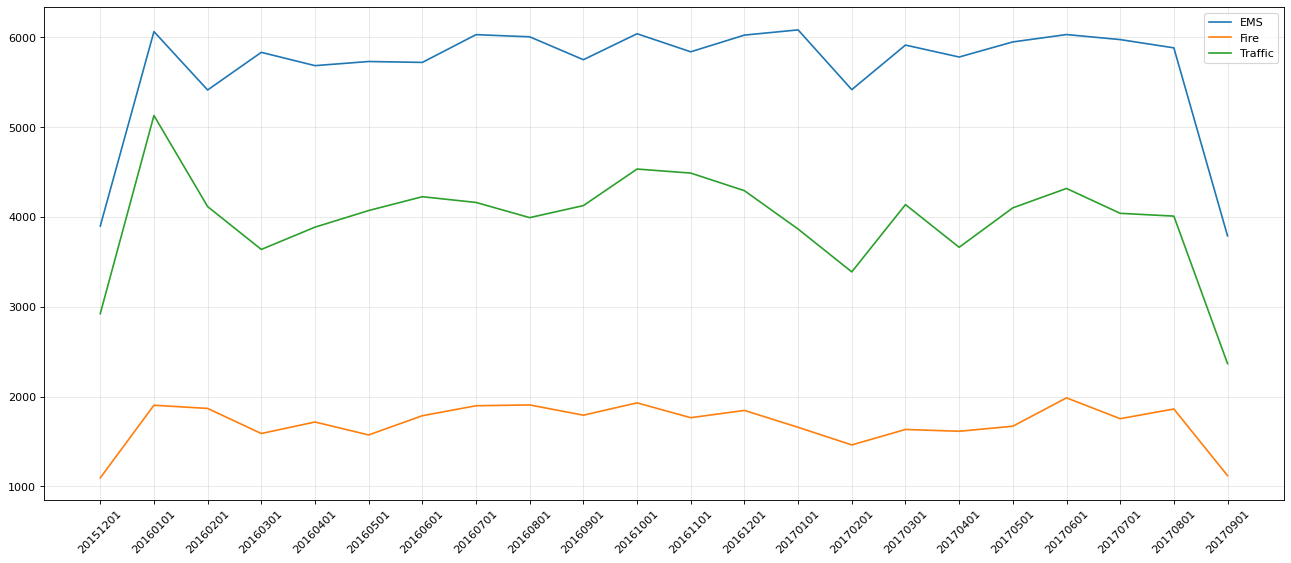

In [46]:
from matplotlib import pyplot as plt

plt.figure(figsize=(20, 8), dpi=80)
for group_name, group_data in df.groupby(by="cate"):
        # 对不同的分类都进行绘图
    count_by_month = group_data.resample("MS").count()["title"]

    # 画图
    _x = count_by_month.index
    # print(_x)
    _y = count_by_month.values

    _x = [i.strftime("%Y%m%d") for i in _x]

    plt.plot(range(len(_x)), _y, label=group_name)

plt.xticks(range(len(_x)), _x, rotation=45)
plt.grid(alpha=0.3)
plt.legend(loc="best")
plt.show()

# pm2.5实战

In [55]:
file_path = "./PM2.5/BeijingPM20100101_20151231.csv"

df = pd.read_csv(file_path)
# print(df.head(10))

# 把分开的时间字符串通过periodIndex的方法转化为pandas的时间类型
period = pd.PeriodIndex.from_fields(year=df["year"], month=df["month"], day=df["day"],
                        hour=df["hour"], freq="h")
print(type(period))
df["datetime"] = period
df

<class 'pandas.core.indexes.period.PeriodIndex'>


,No,year,month,day,hour,season,PM_Dongsi,PM_Dongsihuan,PM_Nongzhanguan,PM_US Post,DEWP,HUMI,PRES,TEMP,cbwd,Iws,precipitation,Iprec,datetime
0,1,2010,1,1,0,4,NaN,NaN,NaN,NaN,-21.0,43.0,1021.0,-11.0,NW,1.79,0.0,0.0,2010-01-01 00:00
1,2,2010,1,1,1,4,NaN,NaN,NaN,NaN,-21.0,47.0,1020.0,-12.0,NW,4.92,0.0,0.0,2010-01-01 01:00
2,3,2010,1,1,2,4,NaN,NaN,NaN,NaN,-21.0,43.0,1019.0,-11.0,NW,6.71,0.0,0.0,2010-01-01 02:00
3,4,2010,1,1,3,4,NaN,NaN,NaN,NaN,-21.0,55.0,1019.0,-14.0,NW,9.84,0.0,0.0,2010-01-01 03:00
4,5,2010,1,1,4,4,NaN,NaN,NaN,NaN,-20.0,51.0,1018.0,-12.0,NW,12.97,0.0,0.0,2010-01-01 04:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52579,52580,2015,12,31,19,4,140.0,157.0,122.0,133.0,-8.0,68.0,1031.0,-3.0,SE,7.14,0.0,0.0,2015-12-31 19:00
52580,52581,2015,12,31,20,4,157.0,199.0,149.0,169.0,-8.0,63.0,1030.0,-2.0,SE,8.03,0.0,0.0,2015-12-31 20:00
52581,52582,2015,12,31,21,4,171.0,231.0,196.0,203.0,-10.0,73.0,1030.0,-6.0,NE,0.89,0.0,0.0,2015-12-31 21:00
52582,52583,2015,12,31,22,4,204.0,242.0,221.0,212.0,-10.0,73.0,1030.0,-6.0,NE,1.78,0.0,0.0,2015-12-31 22:00


In [56]:
# 把datetime 设置为索引
df.set_index("datetime", inplace=True)
df.index = pd.to_datetime(df.index.to_timestamp(),unit="s")
df

,No,year,month,day,hour,season,PM_Dongsi,PM_Dongsihuan,PM_Nongzhanguan,PM_US Post,DEWP,HUMI,PRES,TEMP,cbwd,Iws,precipitation,Iprec
datetime,,,,,,,,,,,,,,,,,,
2010-01-01 00:00:00,1,2010,1,1,0,4,NaN,NaN,NaN,NaN,-21.0,43.0,1021.0,-11.0,NW,1.79,0.0,0.0
2010-01-01 01:00:00,2,2010,1,1,1,4,NaN,NaN,NaN,NaN,-21.0,47.0,1020.0,-12.0,NW,4.92,0.0,0.0
2010-01-01 02:00:00,3,2010,1,1,2,4,NaN,NaN,NaN,NaN,-21.0,43.0,1019.0,-11.0,NW,6.71,0.0,0.0
2010-01-01 03:00:00,4,2010,1,1,3,4,NaN,NaN,NaN,NaN,-21.0,55.0,1019.0,-14.0,NW,9.84,0.0,0.0
2010-01-01 04:00:00,5,2010,1,1,4,4,NaN,NaN,NaN,NaN,-20.0,51.0,1018.0,-12.0,NW,12.97,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-12-31 19:00:00,52580,2015,12,31,19,4,140.0,157.0,122.0,133.0,-8.0,68.0,1031.0,-3.0,SE,7.14,0.0,0.0
2015-12-31 20:00:00,52581,2015,12,31,20,4,157.0,199.0,149.0,169.0,-8.0,63.0,1030.0,-2.0,SE,8.03,0.0,0.0
2015-12-31 21:00:00,52582,2015,12,31,21,4,171.0,231.0,196.0,203.0,-10.0,73.0,1030.0,-6.0,NE,0.89,0.0,0.0


In [57]:
# 进行降采样
df = df.loc[:,["PM_US Post",  "PM_Nongzhanguan"]].resample("7D").mean()
print(df.head())
# 处理缺失数据，删除缺失数据
# print(df["PM_US Post"])

            PM_US Post  PM_Nongzhanguan
datetime                               
2010-01-01   71.627586              NaN
2010-01-08   69.910714              NaN
2010-01-15  163.654762              NaN
2010-01-22   68.069307              NaN
2010-01-29   53.583333              NaN


313 313


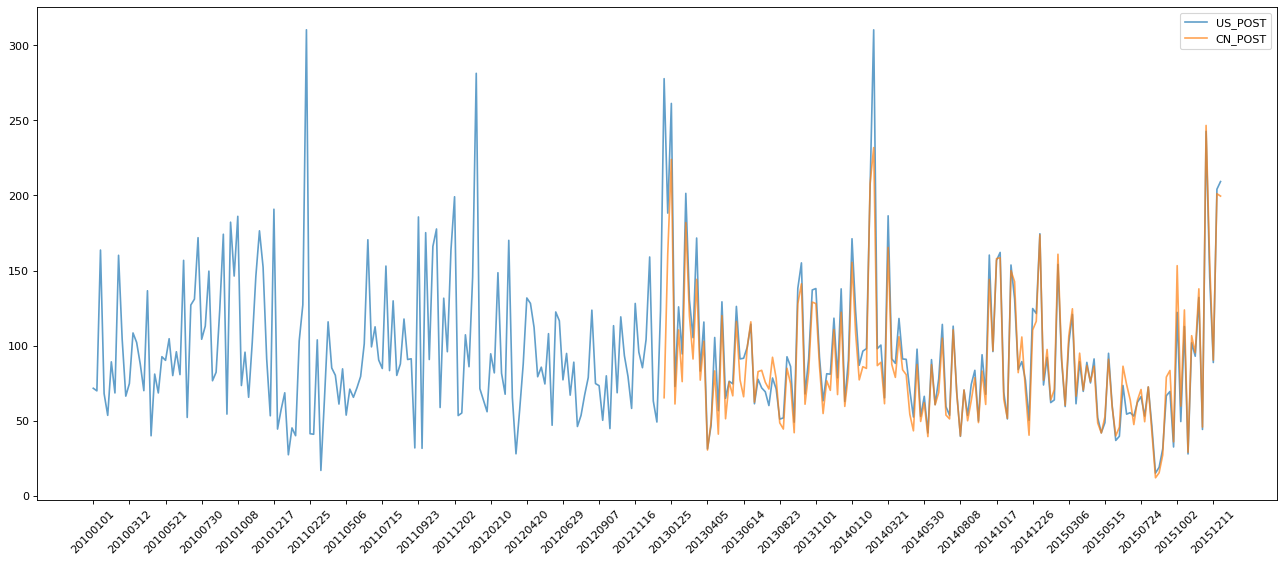

In [59]:
data = df["PM_US Post"]
data_china = df["PM_Nongzhanguan"]

# print(data_china.head(100))
# 画图
_x = data.index
_x = [i.strftime("%Y%m%d") for i in _x]
_x_china = [i.strftime("%Y%m%d") for i in data_china.index]
print(len(_x), len(_x_china))
_y = data.values #  PM_US Post 数据
_y_china = data_china.values # PM_Nongzhanguan 数据

plt.figure(figsize=(20, 8), dpi=80)

plt.plot(range(len(_x)), _y, label="US_POST", alpha=0.7)
plt.plot(range(len(_x_china)), _y_china, label="CN_POST", alpha=0.7)

plt.xticks(range(0, len(_x_china), 10), list(_x_china)[::10], rotation=45) # 设置x轴的刻度，每10个取一个

plt.legend(loc="best")

plt.show()

# 分组格式不变

In [61]:
dict_obj = {'key1' : ['a', 'b', 'a', 'b', 
                      'a', 'b', 'a', 'a'],
            'key2' : ['one', 'one', 'two', 'three',
                      'two', 'two', 'one', 'three'],
            'data1': np.random.randint(1, 10, 8),
            'data2': np.random.randint(1, 10, 8)}
df_obj = pd.DataFrame(dict_obj)
print(df_obj)

  key1   key2  data1  data2
0    a    one      7      6
1    b    one      9      4
2    a    two      2      9
3    b  three      5      3
4    a    two      6      7
5    b    two      3      2
6    a    one      5      4
7    a  three      4      3


In [66]:
# 自定义函数传入transform
def diff_mean(s):
    """
        返回数据与均值的差值
    """
    return s - s.mean()

df2=df_obj.loc[:,['key1','data1', 'data2']].groupby('key1').transform(diff_mean)
df2['key1']=df_obj['key1']
df2

,data1,data2,key1
0,2.200000,0.2,a
1,3.333333,1.0,b
2,-2.800000,3.2,a
3,-0.666667,0.0,b
4,1.200000,1.2,a
5,-2.666667,-1.0,b
6,0.200000,-1.8,a
7,-0.800000,-2.8,a


# 练习星际争霸，分组可以跟参数

In [68]:
dataset_path = './starcraft.csv'
df_data = pd.read_csv(dataset_path, usecols=['LeagueIndex', 'Age', 'HoursPerWeek', 
                                             'TotalHours', 'APM'])

def top_n(df, n=3, column='APM'):
    """
        返回每个分组按 column 的 top n 数据
    """
    return df.sort_values(by=column, ascending=False)[:n]

print(df_data.groupby('LeagueIndex').apply(top_n,include_groups=False))

                   Age  HoursPerWeek  TotalHours       APM
LeagueIndex                                               
1           2214  20.0          12.0       730.0  172.9530
            2246  27.0           8.0       250.0  141.6282
            1753  20.0          28.0       100.0  139.6362
2           3062  20.0           6.0       100.0  179.6250
            3229  16.0          24.0       110.0  156.7380
            1520  29.0           6.0       250.0  151.6470
3           1557  22.0           6.0       200.0  226.6554
            484   19.0          42.0       450.0  220.0692
            2883  16.0           8.0       800.0  208.9500
4           2688  26.0          24.0       990.0  249.0210
            1759  16.0           6.0        75.0  229.9122
            2637  23.0          24.0       650.0  227.2272
5           3277  18.0          16.0       950.0  372.6426
            93    17.0          36.0       720.0  335.4990
            202   37.0          14.0       800.0  327.72

In [72]:
print(df_data.groupby('LeagueIndex').apply(top_n, n=3, column='TotalHours',  include_groups=False))

                   Age  HoursPerWeek  TotalHours       APM
LeagueIndex                                               
1           2676  20.0          24.0      1870.0   67.9392
            2751  29.0           8.0      1000.0   54.4284
            3029  22.0          28.0       900.0   70.5282
2           2452  34.0          24.0      2000.0   69.3036
            3162  23.0          18.0      1800.0   61.6998
            2975  16.0          12.0      1500.0   82.5222
3           2216  24.0          20.0     10260.0   76.5852
            10    16.0          16.0      6000.0  153.8010
            3253  19.0          20.0      6000.0  102.0114
4           1978  22.0          10.0     18000.0  152.2374
            289   19.0          28.0      4000.0  194.1858
            3305  30.0          70.0      2880.0   64.3590
5           1793  18.0          24.0   1000000.0  281.4246
            770   22.0          16.0     20000.0  248.0490
            2140  22.0          10.0      9000.0  106.00